In [35]:
import pandas as pd

transaction = pd.read_csv("data/Transaction.csv")
user = pd.read_csv("data/User.csv")
item = pd.read_csv("data/Item.csv")
visit_mode = pd.read_csv("data/VisitMode.csv")
atype = pd.read_csv("data/Type.csv")

print(transaction.shape)
transaction.head()


(500, 7)


,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating
0,1,26,2022,12,Friends,31,5
1,2,74,2020,12,Business,47,4
2,3,90,2020,2,Couples,16,1
3,4,34,2018,3,Family,42,1
4,5,7,2023,5,Friends,30,2


MODULE 1 — Basic EDA

In [36]:
transaction.info()
transaction.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionId  500 non-null    int64 
 1   UserId         500 non-null    int64 
 2   VisitYear      500 non-null    int64 
 3   VisitMonth     500 non-null    int64 
 4   VisitMode      500 non-null    object
 5   AttractionId   500 non-null    int64 
 6   Rating         500 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 27.5+ KB


,TransactionId,UserId,VisitYear,VisitMonth,AttractionId,Rating
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,49.958000,2020.440000,6.584000,24.752000,3.014000
std,144.481833,29.474629,1.733323,3.549104,13.847816,1.428946
min,1.000000,1.000000,2018.000000,1.000000,1.000000,1.000000
25%,125.750000,24.000000,2019.000000,3.000000,14.000000,2.000000
50%,250.500000,51.000000,2020.000000,7.000000,24.000000,3.000000
75%,375.250000,75.000000,2022.000000,10.000000,36.000000,4.000000
max,500.000000,100.000000,2023.000000,12.000000,50.000000,5.000000


MODULE 2 — Merge Tables

In [37]:
#Merge transaction + user
df = transaction.merge(
    user,
    on="UserId",
    how="left"
)

df.head()


,TransactionId,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContinentId,RegionId,CountryId,CityId
0,1,26,2022,12,Friends,31,5,2,3,3,23
1,2,74,2020,12,Business,47,4,2,1,3,2
2,3,90,2020,2,Couples,16,1,2,9,19,44
3,4,34,2018,3,Family,42,1,2,2,8,40
4,5,7,2023,5,Friends,30,2,1,8,1,17


In [38]:
#Merge item + type
item_type = item.merge(
    atype,
    on="AttractionTypeId",
    how="left"
)

item_type.head()


,AttractionId,AttractionCityId,AttractionTypeId,Attraction,AttractionAddress,AttractionType
0,1,16,4,Attraction_1,Address,Temple
1,2,13,1,Attraction_2,Address,Beach
2,3,42,5,Attraction_3,Address,Monument
3,4,30,2,Attraction_4,Address,Museum
4,5,19,2,Attraction_5,Address,Museum


In [39]:
#Merge everything together
final_df = df.merge(
    item_type,
    left_on="AttractionId",
    right_on="AttractionId",
    how="left"
)

final_df.shape


(500, 16)

MODULE 3 — DATA CLEANING & FEATURE ENGINEERING

In [40]:
#Check missing values
final_df.isnull().sum()


TransactionId        0
UserId               0
VisitYear            0
VisitMonth           0
VisitMode            0
AttractionId         0
Rating               0
ContinentId          0
RegionId             0
CountryId            0
CityId               0
AttractionCityId     0
AttractionTypeId     0
Attraction           0
AttractionAddress    0
AttractionType       0
dtype: int64

In [41]:
#Drop columns we don’t need
final_df = final_df.drop(columns=[
    "TransactionId",
    "Attraction",
    "AttractionAddress"
])

final_df.head()


,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContinentId,RegionId,CountryId,CityId,AttractionCityId,AttractionTypeId,AttractionType
0,26,2022,12,Friends,31,5,2,3,3,23,12,3,Park
1,74,2020,12,Business,47,4,2,1,3,2,26,3,Park
2,90,2020,2,Couples,16,1,2,9,19,44,1,5,Monument
3,34,2018,3,Family,42,1,2,2,8,40,30,4,Temple
4,7,2023,5,Friends,30,2,1,8,1,17,3,3,Park


In [42]:
# Check NumPy version
import numpy as np
np.__version__


'1.26.4'

In [43]:
# STEP 3.3: Encode categorical columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

final_df["VisitMode"] = le.fit_transform(final_df["VisitMode"].astype(str))
final_df["AttractionType"] = le.fit_transform(final_df["AttractionType"].astype(str))

final_df.head()


,UserId,VisitYear,VisitMonth,VisitMode,AttractionId,Rating,ContinentId,RegionId,CountryId,CityId,AttractionCityId,AttractionTypeId,AttractionType
0,26,2022,12,3,31,5,2,3,3,23,12,3,3
1,74,2020,12,0,47,4,2,1,3,2,26,3,3
2,90,2020,2,1,16,1,2,9,19,44,1,5,1
3,34,2018,3,2,42,1,2,2,8,40,30,4,4
4,7,2023,5,3,30,2,1,8,1,17,3,3,3


MODULE 4 — Feature Selection & Train-Test Split

In [44]:
# Define: Import train-test split
from sklearn.model_selection import train_test_split

# Define: Select ONLY numeric feature columns
X = final_df[
    [
        "VisitYear",        # Define: Year of visit (numeric)
        "VisitMonth",       # Define: Month of visit (numeric)
        "VisitMode",        # Define: Encoded visit mode (numeric)
        "AttractionType"    # Define: Encoded attraction type (numeric)
    ]
]

# Define: Target variable (numeric rating)
y = final_df["Rating"]

# Define: Confirm all features are numeric
X.dtypes


VisitYear         int64
VisitMonth        int64
VisitMode         int32
AttractionType    int32
dtype: object

In [45]:
# Define: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X,                 # Define: Input features
    y,                 # Define: Target labels
    test_size=0.2,     # Define: 20% data for testing
    random_state=42    # Define: Ensures reproducible results
)

# Define: Confirm split sizes
print(X_train.shape, X_test.shape)


(400, 4) (100, 4)


MODULE 5 — Model Training & Evaluation[reminder to name steps from module 1-4]

We’ll train two models:

Regression → predict exact rating

Classification → predict rating category (Low / Medium / High)

In [46]:
#step 5.1
# Define: Import regression model
from sklearn.linear_model import LinearRegression

# Define: Create Linear Regression model object
lr_model = LinearRegression()

# Define: Train model using training data
lr_model.fit(X_train, y_train)

# Define: Predict ratings on test data
y_pred_lr = lr_model.predict(X_test)

# Define: Show first 5 predictions
y_pred_lr[:5]


array([2.90078336, 3.09017135, 3.15305027, 3.09305892, 3.08878821])

In [47]:
#step 5.2
# Define: Import evaluation metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Define: Calculate MAE
mae = mean_absolute_error(y_test, y_pred_lr)

# Define: Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Define: Calculate R² score
r2 = r2_score(y_test, y_pred_lr)

# Define: Print metrics
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)


MAE: 1.2097452805950775
RMSE: 1.4259548609279178
R2 Score: 0.0022340323843381693


In [48]:
#step 5.3
# Define: Convert numeric rating into categorical classes
def rating_category(rating):
    if rating <= 2:
        return "Low"
    elif rating == 3:
        return "Medium"
    else:
        return "High"

# Define: Apply categorization
final_df["RatingCategory"] = final_df["Rating"].apply(rating_category)

# Define: Verify new column
final_df[["Rating", "RatingCategory"]].head()


,Rating,RatingCategory
0,5,High
1,4,High
2,1,Low
3,1,Low
4,2,Low


In [49]:
#step 5.4 
# Define: Select features again
X_cls = final_df[
    [
        "VisitYear",
        "VisitMonth",
        "VisitMode",
        "AttractionType"
    ]
]

# Define: Target variable
y_cls = final_df["RatingCategory"]

# Define: Split classification data
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cls,
    y_cls,
    test_size=0.2,
    random_state=42
)


In [50]:
#step 5.5 
# Define: Import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

# Define: Create model
rf_model = RandomForestClassifier(
    n_estimators=100,    # Define: Number of trees
    random_state=42
)

# Define: Train classifier
rf_model.fit(X_train_c, y_train_c)

# Define: Predict categories
y_pred_cls = rf_model.predict(X_test_c)


In [51]:
#step 5.6 
# Define: Import classification metrics
from sklearn.metrics import accuracy_score, classification_report

# Define: Accuracy score
accuracy = accuracy_score(y_test_c, y_pred_cls)

# Define: Print accuracy
print("Accuracy:", accuracy)

# Define: Detailed performance report
print(classification_report(y_test_c, y_pred_cls))


Accuracy: 0.35
              precision    recall  f1-score   support

        High       0.39      0.45      0.42        42
         Low       0.35      0.38      0.37        34
      Medium       0.21      0.12      0.16        24

    accuracy                           0.35       100
   macro avg       0.32      0.32      0.31       100
weighted avg       0.33      0.35      0.34       100



Module 6: Model Evaluation & Comparison

In [52]:
#6.1.1 Install required libraries (run this once)
!pip install matplotlib seaborn pandas --quiet

#6.1.2 Import Required Libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [53]:
#6.1.3 Encode categorical target labels for classification
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Fit on y_train and transform both train and test
y_train_enc = le.fit_transform(y_train)  # numeric labels for training
y_test_enc = le.transform(y_test)        # numeric labels for testing


In [54]:
print("y_test type:", type(y_test))
print("y_test sample values:\n", y_test[:10])


y_test type: <class 'pandas.core.series.Series'>
y_test sample values:
 361    4
73     4
374    5
155    5
104    2
394    1
377    5
124    1
68     5
450    2
Name: Rating, dtype: int64


In [55]:
#6.2.1 Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#6.2.2 Create Random Forest classification model
rf_clf = RandomForestClassifier(random_state=42)

#6.2.3 Train model using encoded target
rf_clf.fit(X_train, y_train_enc)

#6.2.4 Predict on test data
y_pred_rf = rf_clf.predict(X_test)


In [56]:
#6.3.1 Calculate Accuracy
accuracy = accuracy_score(y_test_enc, y_pred_rf)
print("Accuracy:", accuracy)

#6.3.2 Print Classification Report
print("\nClassification Report:\n")
print(classification_report(y_test_enc, y_pred_rf))

#6.3.3 Generate Confusion Matrix
cm = confusion_matrix(y_test_enc, y_pred_rf)


Accuracy: 0.27

Classification Report:

              precision    recall  f1-score   support

           0       0.25      0.20      0.22        20
           1       0.21      0.29      0.24        14
           2       0.35      0.29      0.32        24
           3       0.26      0.37      0.30        19
           4       0.28      0.22      0.24        23

    accuracy                           0.27       100
   macro avg       0.27      0.27      0.27       100
weighted avg       0.28      0.27      0.27       100



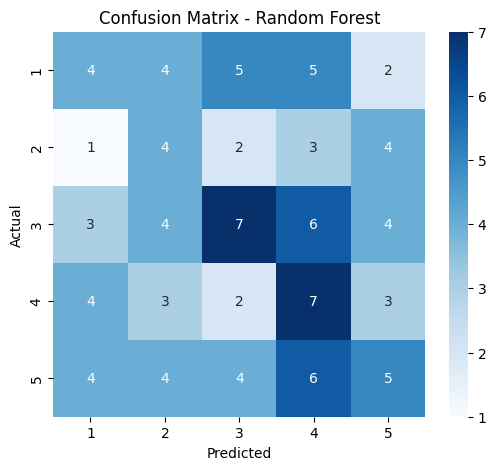

In [57]:
#6.4.1 Plot confusion matrix
plt.figure(figsize=(6,5))

sns.heatmap(cm,
            annot=True,
            fmt="d",
            cmap="Blues",
            xticklabels=le.classes_,
            yticklabels=le.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")

plt.show()


Module 7 — Recommendation System

In [58]:
# Check column names in final_df
print(final_df.columns)


Index(['UserId', 'VisitYear', 'VisitMonth', 'VisitMode', 'AttractionId',
       'Rating', 'ContinentId', 'RegionId', 'CountryId', 'CityId',
       'AttractionCityId', 'AttractionTypeId', 'AttractionType',
       'RatingCategory'],
      dtype='object')


In [59]:
# Step 7.1 — Create User-Item matrix for recommendation

# Define: Create pivot table (users as rows, attractions as columns)
user_item_matrix = final_df.pivot_table(
    index="UserId",          # Correct column name
    columns="AttractionId",  # Correct column name
    values="Rating"
)

# Define: Replace missing ratings with 0
user_item_matrix = user_item_matrix.fillna(0)

# Define: Show matrix
user_item_matrix.head()


AttractionId,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
UserId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,5.0,0.0,...,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,2.0


In [60]:
# Step 7.2 — Calculate similarity between users

from sklearn.metrics.pairwise import cosine_similarity

# Define: Compute cosine similarity
user_similarity = cosine_similarity(user_item_matrix)

# Define: Convert to DataFrame for readability
user_similarity_df = pd.DataFrame(
    user_similarity,
    index=user_item_matrix.index,
    columns=user_item_matrix.index
)

user_similarity_df.head()


UserId,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
UserId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.0,0.162142,0.368271,0.0,0.140812,0.000000,0.000000,0.660396,0.238073,...,0.00000,0.000000,0.0,0.000000,0.268239,0.000000,0.60311,0.127573,0.220648,0.000000
2,0.000000,1.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
3,0.162142,0.0,1.000000,0.174714,0.0,0.300616,0.077254,0.067267,0.069338,0.067767,...,0.00000,0.013799,0.0,0.258008,0.349957,0.000000,0.00000,0.000000,0.078509,0.000000
4,0.368271,0.0,0.174714,1.000000,0.0,0.251265,0.000000,0.000000,0.314970,0.000000,...,0.00000,0.012536,0.0,0.093761,0.202326,0.296957,0.00000,0.041239,0.000000,0.000000
5,0.000000,0.0,0.000000,0.000000,1.0,0.074371,0.199086,0.013001,0.000000,0.000000,...,0.10401,0.170687,0.0,0.146277,0.196768,0.126350,0.00000,0.000000,0.012139,0.108927


In [71]:
# Step 7.4 — Test recommendation system

recommend_attractions(user_id=1)


AttractionId
14    3.0
Name: 9, dtype: float64

In [69]:
# Step 7.3 (Improved) — Clean recommendation function

def recommend_attractions(user_id, top_n=5):
    
    # Get similarity scores
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)
    
    # Remove the user itself
    similar_users = similar_users.iloc[1:]
    
    # Get most similar user
    most_similar_user = similar_users.index[0]
    
    # Ratings of similar user
    similar_user_ratings = user_item_matrix.loc[most_similar_user]
    
    # Ratings of current user
    user_ratings = user_item_matrix.loc[user_id]
    
    # Attractions current user hasn't rated
    unrated_attractions = user_ratings[user_ratings == 0]
    
    # Filter only rated attractions by similar user
    recommendations = similar_user_ratings[unrated_attractions.index]
    recommendations = recommendations[recommendations > 0]
    
    return recommendations.sort_values(ascending=False).head(top_n)


Module 8 — Model Comparison Summary

In [75]:
# Step 8.1 — Recalculate regression metrics properly

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Linear Regression metrics
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Random Forest metrics
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Create comparison table
model_comparison = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest Regressor"],
    "R2 Score": [r2_lr, r2_rf],
    "RMSE": [rmse_lr, rmse_rf]
})

model_comparison


,Model,R2 Score,RMSE
0,Linear Regression,0.002234,1.425955
1,Random Forest Regressor,-1.271947,2.151743


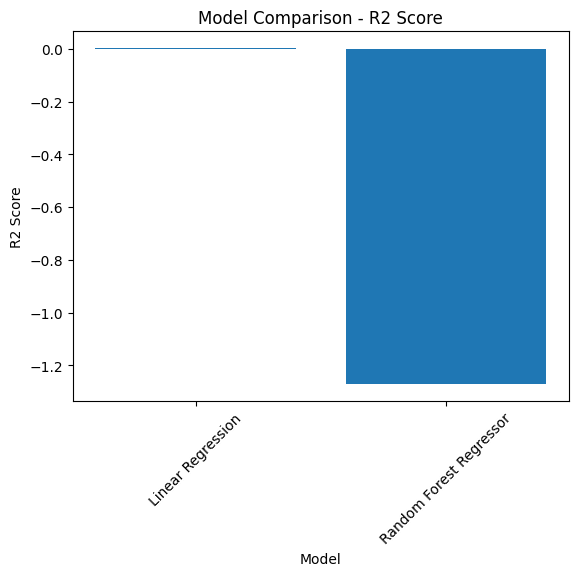

In [76]:
# Step 8.2 — Visual comparison of models

import matplotlib.pyplot as plt

plt.figure()
plt.bar(model_comparison["Model"], model_comparison["R2 Score"])
plt.title("Model Comparison - R2 Score")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.show()
